# Case Study: Does wage gap exist among female millennials?

STAT101 by Aj. Yas

ข้อมูลที่ใช้ Statistics of 2016 American Recent Graduates' Median Wage and Share of Women By Their Major of Studies

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wage.csv')

In [3]:
df.head()

,Major,Major_category,Total,STEM,BUSINESS,%Women,%PartTime,%Unemployed,%CollegeJob,MedianWage
0,FOOD SCIENCE,Agriculture & Natural Resources,4361,0,0,22.27%,25.71%,9.69%,40.21%,53000
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,14240,0,0,59.42%,15.42%,5.00%,20.25%,40000
2,GENERAL AGRICULTURE,Agriculture & Natural Resources,10399,0,0,51.55%,19.53%,1.96%,30.32%,40000
3,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,2439,0,0,58.97%,25.42%,7.72%,35.15%,40000
4,NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources,13773,0,0,56.46%,18.97%,6.66%,37.53%,35000


In [4]:
def convert_percentage_to_number(value):
    return float(value.replace('%', '')) / 100

In [5]:
df['%Women'] = df['%Women'].map(convert_percentage_to_number)
df['%PartTime'] = df['%PartTime'].map(convert_percentage_to_number)
df['%Unemployed'] = df['%Unemployed'].map(convert_percentage_to_number)
df['%CollegeJob'] = df['%CollegeJob'].map(convert_percentage_to_number)

In [6]:
df.describe()

,Total,STEM,BUSINESS,%Women,%PartTime,%Unemployed,%CollegeJob,MedianWage
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,39394.715116,0.441860,0.075581,0.523090,0.224513,0.068587,0.456089,40152.325581
std,63468.993551,0.498058,0.265099,0.231134,0.076256,0.029964,0.195149,11503.665592
min,609.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050700,22000.000000
25%,4559.750000,0.000000,0.000000,0.336050,0.170775,0.050750,0.304025,33000.000000
50%,15104.000000,0.000000,0.000000,0.539550,0.225000,0.068300,0.410000,36000.000000
75%,38909.750000,1.000000,0.000000,0.703275,0.274350,0.087625,0.629925,45000.000000
max,393735.000000,1.000000,1.000000,0.969000,0.411400,0.177200,0.847600,110000.000000


In [7]:
df.isna().sum()

Major             0
Major_category    0
Total             0
STEM              0
BUSINESS          0
%Women            0
%PartTime         0
%Unemployed       0
%CollegeJob       0
MedianWage        0
dtype: int64

In [8]:
%matplotlib inline
from pandas.plotting import scatter_matrix

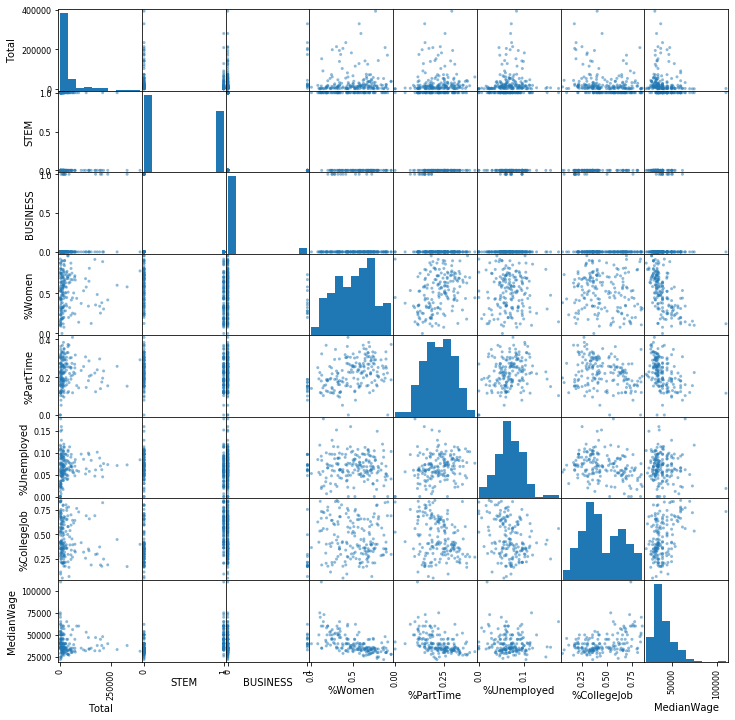

In [9]:
scatter_matrix(df, figsize=(12, 12));

In [10]:
%matplotlib inline
import seaborn as sns

## คำถาม Does share of women in college major explain recent graduate's median wage?

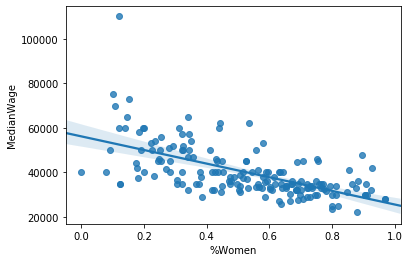

In [11]:
sns.regplot(x='%Women', y='MedianWage', data=df)

เตรียมข้อมูล X และ y เพื่อนำไปหาค่าทางสถิติต่างๆ

In [12]:
X = df[['%Women']]
y = df['MedianWage']

### หาค่า Coefficients ของโมเดล Regression

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-30610.43733308]
56164.342805309614


จากโมเดลที่ได้ด้านบน เราสามารถแปลความหมายได้ตามนี้

สมการ Median Wage = 56164 - 3061 * (% Women)

* % Women เพิ่ม 1% >>>>> Median Wage จะลดลง = 0.01 * 30610 = 306 USD
* % Women เพิ่ม 10% >>>>> Median Wage จะลดลง = 0.1 * 30610 = 3061 USD

### หาค่า P-Value

In [14]:
from sklearn.feature_selection import f_regression
_, p_val = f_regression(X, y)
print(p_val)

[2.81681584e-19]


ถ้า P-value มีค่าน้อยกว่า 0.05 หรือ 0.01 จะบอกได้ประมาณว่าข้อมูลของเราไม่โกหก มีความน่าเชื่อถือ

### หาค่า R^2

เพื่อดูว่าเราต้องหาข้อมูลเพิ่มหรือเปล่า ยิ่งค่าใกล้ 1 ยิ่งดี (อ่านความแตกต่างระหว่าง adjusted R^2 กับ R^2 ได้ที่ https://datascience.stackexchange.com/a/14697/261)

In [15]:
from sklearn.metrics import r2_score

In [16]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
r2_score(y, y_pred)

0.3782619245288188

## Extension to the simple linear regression model

We want to simutaneously explain Median Wage with

* %Women
* %PartTime
* %Unemployed
* %CollegeJob

In [17]:
X = df[['%Women', '%PartTime', '%Unemployed', '%CollegeJob']]
y = df['MedianWage']

### Coefficients

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-2.61030532e+04 -2.89315954e+04 -2.03784464e+01  1.73901126e+04]
52372.06417202245


### P-Value

In [19]:
from sklearn.feature_selection import f_regression
_, p_val = f_regression(X, y)
print(p_val)

[2.81681584e-19 2.08189936e-09 1.48363458e-01 3.85867222e-08]


### R^2

In [20]:
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print(r2_score(y, y_pred))

0.5255589058175004


## What if we include the STEM and BUSINSS in the model?

In [21]:
X = df[['%Women', '%PartTime', '%Unemployed', '%CollegeJob', 'STEM', 'BUSINESS']]
y = df['MedianWage']

### Coefficients

In [22]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-22953.50432113 -25226.43738173   2362.1920856   14186.74180801
   4803.49939113   3910.27177676]
48772.298061735666


### P-Value

In [23]:
from sklearn.feature_selection import f_regression
_, p_val = f_regression(X, y)
print(p_val)

[2.81681584e-19 2.08189936e-09 1.48363458e-01 3.85867222e-08
 1.63772683e-10 2.70916262e-01]


### R^2

In [24]:
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print(r2_score(y, y_pred))

0.5571183750118343


## What if we include the STEM, BUSINSS, and major category in the model?

In [25]:
df['major_category_cat'] = df['Major_category'].astype('category').cat.codes

In [26]:
X = df[['%Women', '%PartTime', '%Unemployed', '%CollegeJob', 'STEM', 'BUSINESS', 'major_category_cat']]
y = df['MedianWage']

### Coeffients

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-22803.1469628  -25413.69742881   1527.54187249  14372.78588354
   4935.05896436   4628.19700766    142.16414486]
47605.5006296326


### P-Value

In [28]:
from sklearn.feature_selection import f_regression
_, p_val = f_regression(X, y)
print(p_val)

[2.81681584e-19 2.08189936e-09 1.48363458e-01 3.85867222e-08
 1.63772683e-10 2.70916262e-01 6.63661011e-01]


### R^2

In [29]:
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print(r2_score(y, y_pred))

0.5596010410321706


## Linear Regression with Interaction Term

In [44]:
def swap_zero_and_one(val):
    return 1 - val

In [45]:
df['Non_STEM'] = df['STEM'].map(swap_zero_and_one)

In [46]:
df['Women_Non_STEM'] = df['%Women'] * df['Non_STEM']

In [47]:
X = df[['%Women', '%PartTime', '%Unemployed', '%CollegeJob', 'Women_Non_STEM', 'STEM', 'BUSINESS']]
y = df['MedianWage']

### Coefficients

In [48]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-25696.32209943 -26240.58308203   2212.56487597  13147.16140664
   6392.20096468   8389.70959756   4425.37767895]
47206.96175047608


### P-Value

In [49]:
from sklearn.feature_selection import f_regression
_, p_val = f_regression(X, y)
print(p_val)

[2.81681584e-19 2.08189936e-09 1.48363458e-01 3.85867222e-08
 1.18840193e-14 1.63772683e-10 2.70916262e-01]


### R^2

In [50]:
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print(r2_score(y, y_pred))

0.5603808085728381
